# Feature Selection and analysis

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.stat import Correlation
property_data_2022 = pd.read_csv('../data/raw/2022_house_data.csv')
property_data_2022 = property_data_2022[property_data_2022['week_rent']!='No Available']
property_data_2022['week_rent'] = property_data_2022['week_rent'].astype('float')
property_data_2017_2021 = pd.read_csv('../data/raw/2017_2021_house_data.csv')
property_data_2017_2021['week_rent'] = property_data_2017_2021['week_rent'].astype('float')
all_house = pd.concat([property_data_2017_2021,property_data_2022],axis = 0)

# Draw a heatmap to have a brief knowledge about the correlation between features

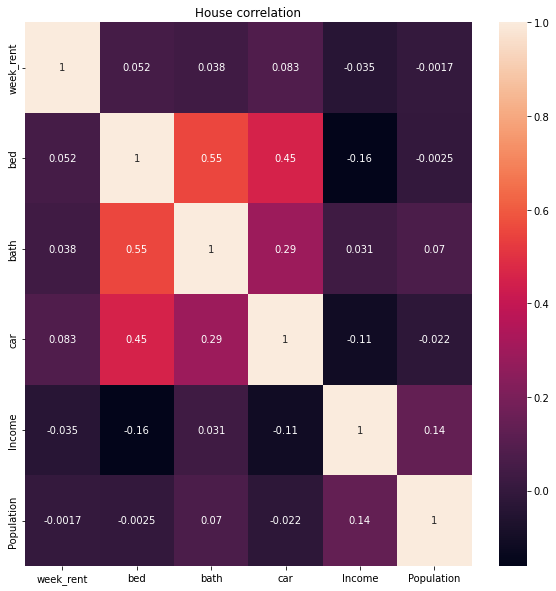

In [38]:
CORR_COLS=['week_rent','bed','bath','car','Income','Population']
f, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(all_house[CORR_COLS].corr(),annot=True)
plt.title('House correlation')
plt.show()

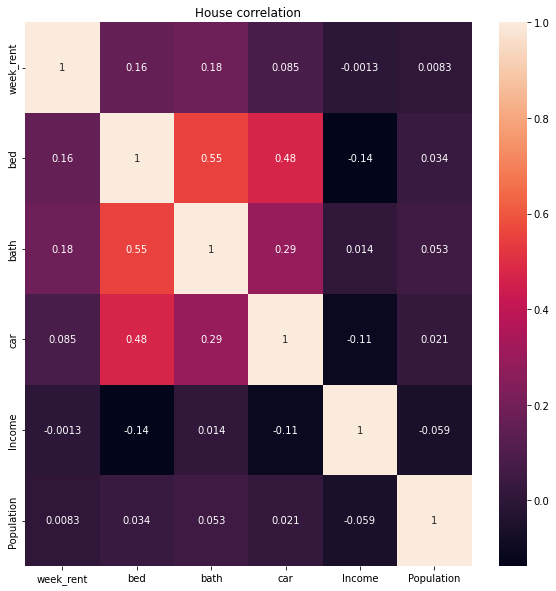

In [39]:
CORR_COLS=['week_rent','bed','bath','car','Income','Population']
f, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(property_data_2022[CORR_COLS].corr(),annot=True)
plt.title('House correlation')
plt.show()

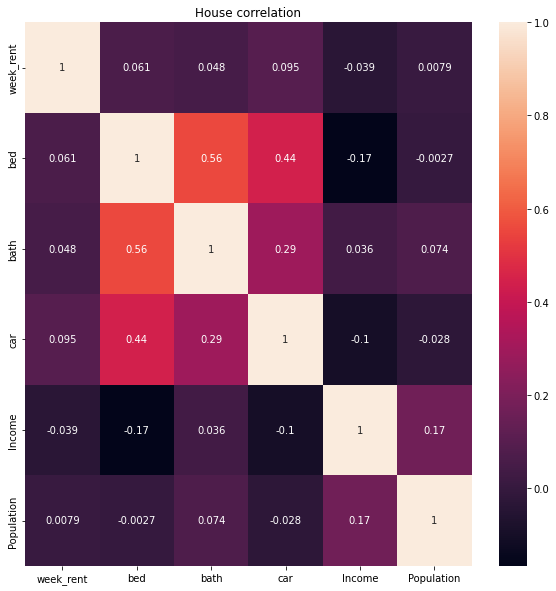

In [40]:
CORR_COLS=['week_rent','bed','bath','car','Income','Population']
f, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(property_data_2017_2021[CORR_COLS].corr(),annot=True)
plt.title('House correlation')
plt.show()